Checking every iteration of the raw data to try and find the 20Hz/30Hz tags.

In [20]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from intermodulation.freqtag_spec import TRIGGERS
from intermodulation.utils import nested_iteritems

mne.set_config("MNE_BROWSER_BACKEND", "matplotlib")
%matplotlib inline

# Load the epoched data
datapath = Path("C:/Users/gerce/Documents/Projects/results/syntax_im/241018/")
events = mne.read_events(datapath / "pilot03-eve.fif")
events1w = events[np.isin(events[:, 2], np.arange(40, 50))]
usedtrigs = np.unique(events1w[:, 2])
triglabels = {"/".join(k): v for k, v in nested_iteritems(TRIGGERS) if v in usedtrigs}
target_evok = ["F1", "F2"]

# Load raw data with only cHPI and line noise filtering, epoch, and compute PSD on 1-word task
rawfile = datapath / "pilot03.fif"
raw = mne.io.read_raw_fif(rawfile, preload=True)
epochs_raw = mne.Epochs(raw, events1w, event_id=triglabels, tmin=-0.2, tmax=2.0, preload=True)
del raw
spect_rawf1 = epochs_raw["F1"].compute_psd(fmax=70, n_jobs=-1)
spect_rawf2 = epochs_raw["F2"].compute_psd(fmax=70, n_jobs=-1)
evokeds_raw = []
for evok in target_evok:
    evokeds_raw.append(epochs_raw[evok].average())
del epochs_raw


# Load raw data with only cHPI and line noise filtering, epoch, and compute PSD on 1-word task
rawfile = datapath / "pilot03_cHPI_line_preproc.fif"
raw = mne.io.read_raw_fif(rawfile, preload=True)
epochs_chpiline = mne.Epochs(raw, events1w, event_id=triglabels, tmin=-0.2, tmax=2.0, preload=True)
del raw
spect_chpilinef1 = epochs_chpiline["F1"].compute_psd(fmax=70, n_jobs=-1)
spect_chpilinef2 = epochs_chpiline["F2"].compute_psd(fmax=70, n_jobs=-1)
evokeds_chpiline = []
for evok in target_evok:
    evokeds_chpiline.append(epochs_chpiline[evok].average())
del epochs_chpiline

# As above, but for SSS filtering also
rawfile = datapath / "pilot03_cHPI_line_sss.fif"
raw = mne.io.read_raw_fif(rawfile, preload=True)
epochs_sss = mne.Epochs(raw, events1w, event_id=triglabels, tmin=-0.2, tmax=2.0, preload=True)
del raw
spect_sssf1 = epochs_sss["F1"].compute_psd(fmax=70, n_jobs=-1)
spect_sssf2 = epochs_sss["F2"].compute_psd(fmax=70, n_jobs=-1)
evokeds_sss = []
for evok in target_evok:
    evokeds_sss.append(epochs_sss[evok].average())
del epochs_sss

# As above, but for the AutoReject epochs which have excluded trials and "repairing" of the data
# epochfile = datapath / "pilot03-preproc-1w-epo-autorej.fif"
# epochs_arj = mne.read_epochs(epochfile)
# spect_arj = epochs_arj["F1"].compute_psd(fmax=70, n_jobs=-1)
# evokeds_arj = []
# for evok in target_evok:
#     evokeds_arj.append(epochs_arj[evok].average())
# del epochs_arj


Opening raw data file C:\Users\gerce\Documents\Projects\results\syntax_im\241018\pilot03.fif...
    Read a total of 17 projection items:
        ssp_combined_0_68deg (1 x 306)  idle
        ssp_combined_1_68deg (1 x 306)  idle
        ssp_combined_2_68deg (1 x 306)  idle
        ssp_combined_3_68deg (1 x 306)  idle
        ssp_combined_4_68deg (1 x 306)  idle
        ssp_combined_5_68deg (1 x 306)  idle
        ssp_combined_6_68deg (1 x 306)  idle
        ssp_combined_7_68deg (1 x 306)  idle
        ssp_combined_8_68deg (1 x 306)  idle
        ssp_combined_9_68deg (1 x 306)  idle
        ssp_combined_10_68deg (1 x 306)  idle
        ssp_combined_11_68deg (1 x 306)  idle
        ssp_combined_12_68deg (1 x 306)  idle
        ssp_combined_13_68deg (1 x 306)  idle
        ssp_combined_14_68deg (1 x 306)  idle
        ssp_combined_15_68deg (1 x 306)  idle
        ssp_combined_16_68deg (1 x 306)  idle
    Range : 19000 ... 1687999 =     19.000 ...  1687.999 secs
Ready.
Opening raw data file 

C:\Users\gerce\AppData\Local\Temp\ipykernel_23072\1197308093.py:21: RuntimeWarning: This filename (C:\Users\gerce\Documents\Projects\results\syntax_im\241018\pilot03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(rawfile, preload=True)


Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 17)
17 projection items activated
Using data from preloaded Raw for 120 events and 2201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file C:\Users\gerce\Documents\Projects\results\syntax_im\241018\pilot03_cHPI_line_preproc.fif...
    Read a total of 17 projection items:
        ssp_combined_0_68deg (1 x 306)  idle
        ssp_combined_1_68deg (1 x 306)  idle
        ssp_combined_2_68deg (1 x 306)  idle
        ssp_combined_3_68deg (1 x 306)  idle
        ssp_combined_4_68deg (1 x 306)  idle
        ssp_combined_5_68deg (1 x 306)  idle
        ssp_combined_6_68deg (1 x 306)  idle
        ssp_combined_7_68deg (1 x 306)  idle
        ssp_combined_8_68deg (1 x 306)  idle
      

C:\Users\gerce\AppData\Local\Temp\ipykernel_23072\1197308093.py:34: RuntimeWarning: This filename (C:\Users\gerce\Documents\Projects\results\syntax_im\241018\pilot03_cHPI_line_preproc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(rawfile, preload=True)


Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 17)
17 projection items activated
Using data from preloaded Raw for 120 events and 2201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file C:\Users\gerce\Documents\Projects\results\syntax_im\241018\pilot03_cHPI_line_sss.fif...
    Range : 19000 ... 1751999 =     19.000 ...  1751.999 secs
Ready.
Opening raw data file C:\Users\gerce\Documents\Projects\results\syntax_im\241018\pilot03_cHPI_line_sss-1.fif...
    Range : 1752000 ... 2674999 =   1752.000 ...  2674.999 secs
Ready.
Reading 0 ... 2655999  =      0.000 ...  2655.999 secs...


C:\Users\gerce\AppData\Local\Temp\ipykernel_23072\1197308093.py:46: RuntimeWarning: This filename (C:\Users\gerce\Documents\Projects\results\syntax_im\241018\pilot03_cHPI_line_sss.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(rawfile, preload=True)


Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 2201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


Averaging across epochs before plotting...
Averaging across epochs before plotting...
Averaging across epochs before plotting...
Averaging across epochs before plotting...
Averaging across epochs before plotting...
Averaging across epochs before plotting...


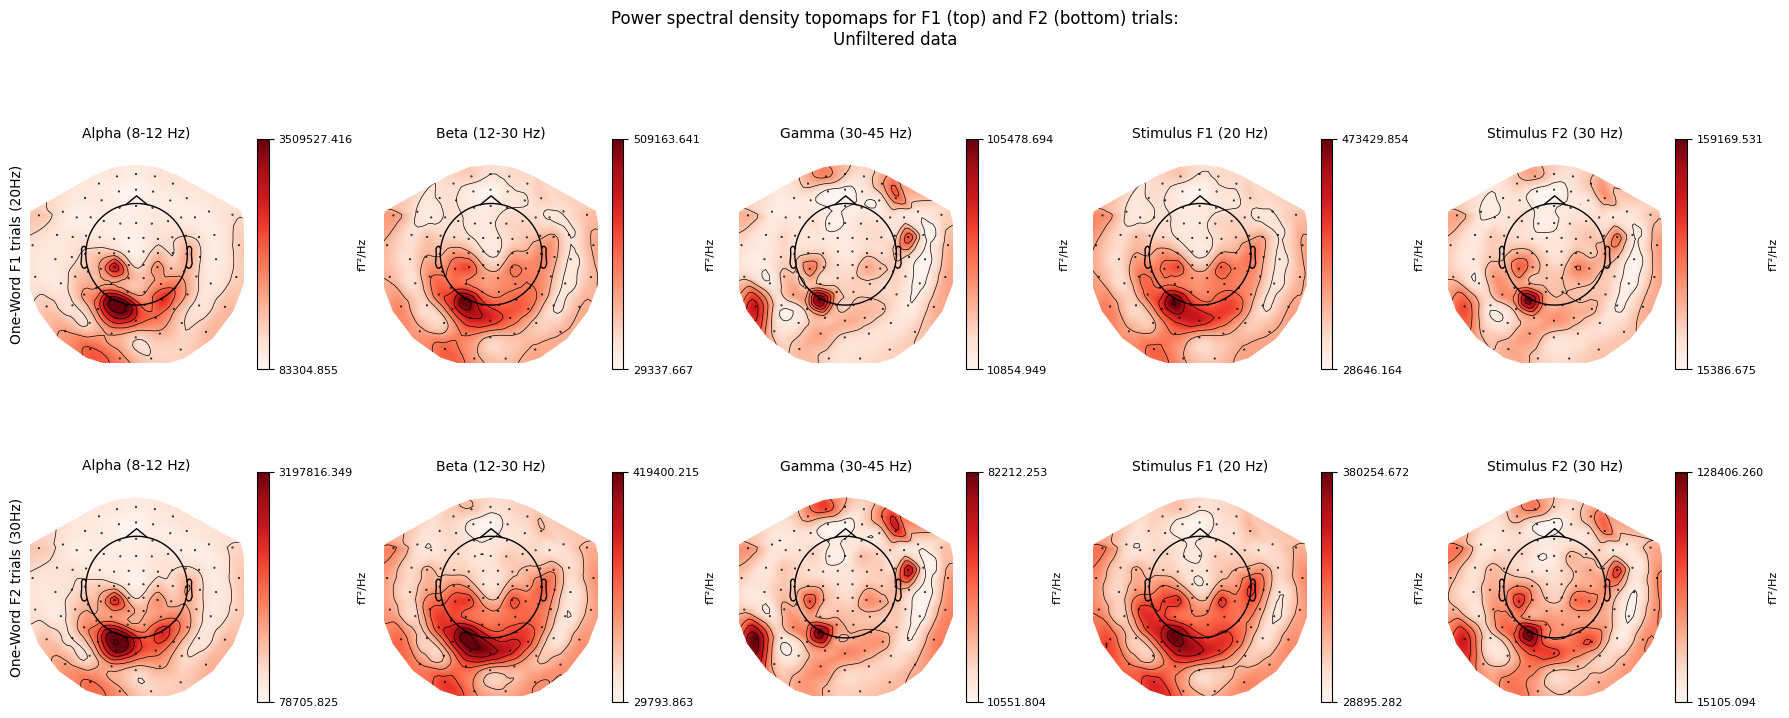

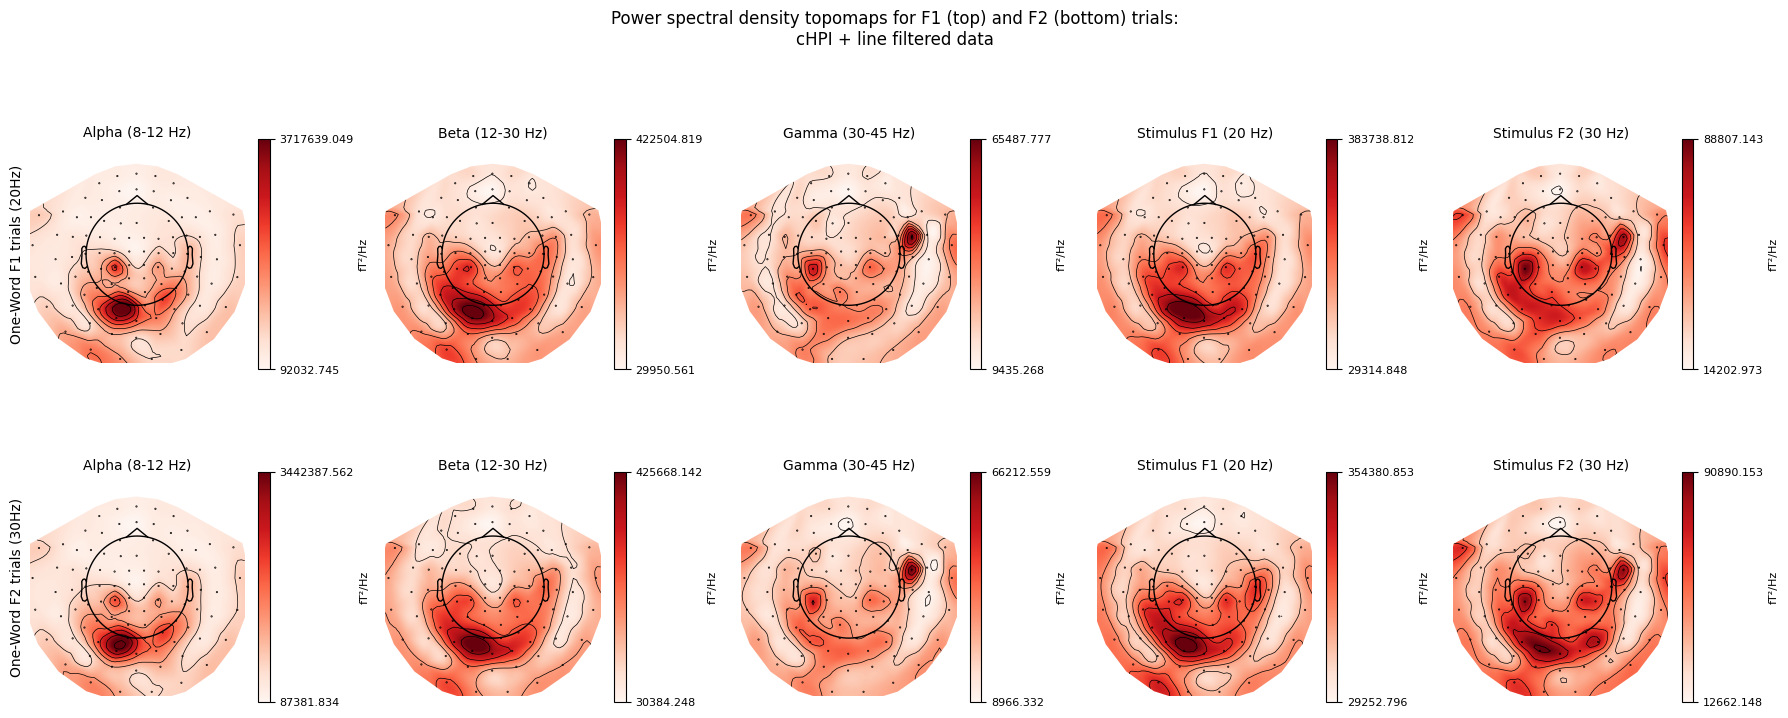

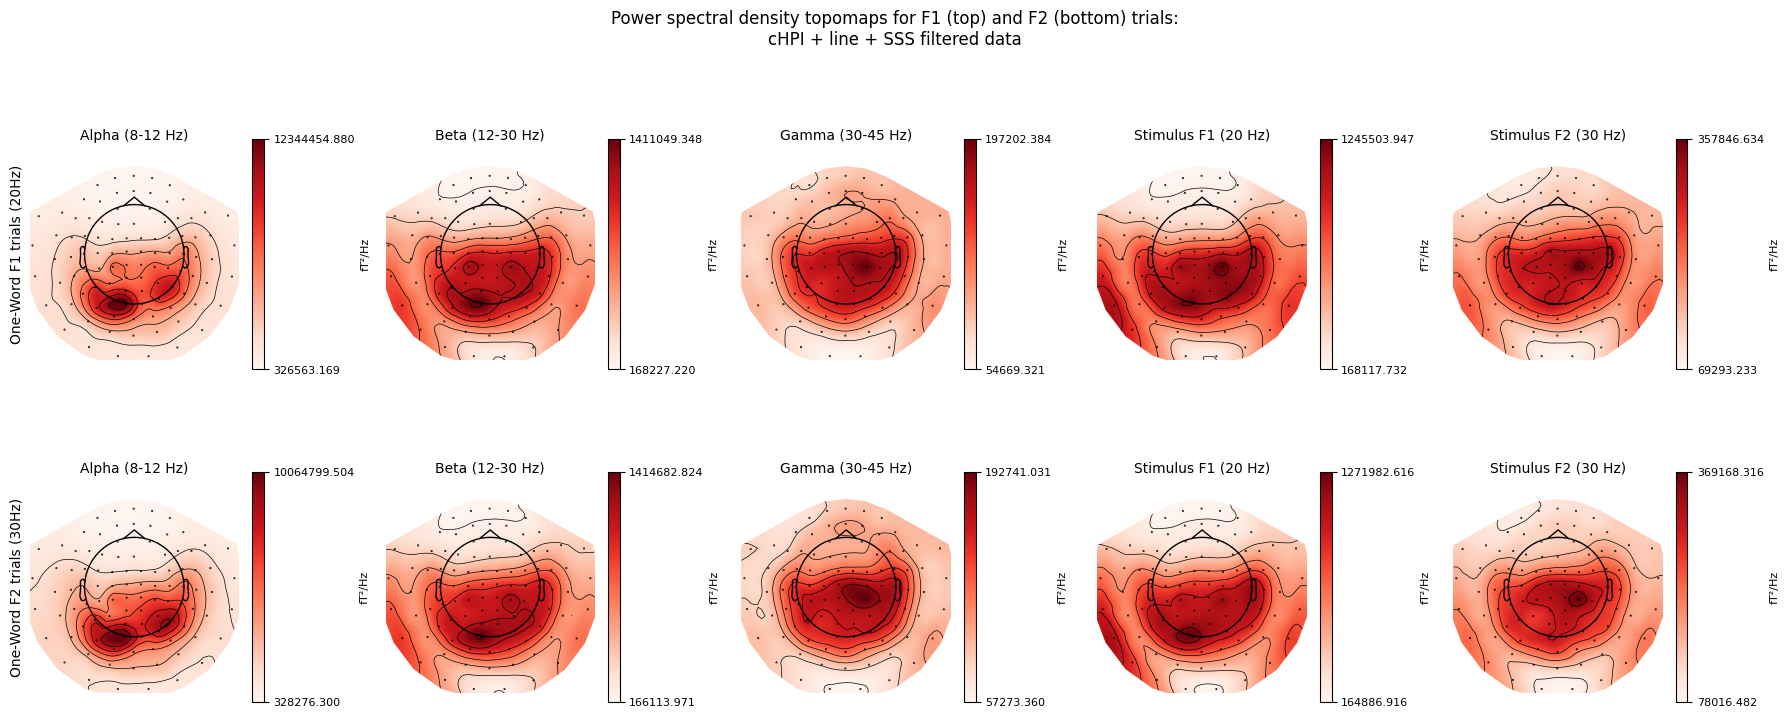

In [21]:
basebands = {"Alpha (8-12 Hz)": (8, 12), "Beta (12-30 Hz)": (12, 30), "Gamma (30-45 Hz)": (30, 45)}
basebands["Stimulus F1 (20 Hz)"] = (19, 21)
basebands["Stimulus F2 (30 Hz)"] = (29, 31)
fig, ax = plt.subplots(2, 5, figsize=(18, 8))
spect_rawf1.plot_topomap(bands=basebands, axes=ax[0])
spect_rawf2.plot_topomap(bands=basebands, axes=ax[1])
ax[0, 0].set_ylabel("One-Word F1 trials (20Hz)")
ax[1, 0].set_ylabel("One-Word F2 trials (30Hz)")
# ax[2, 0].set_ylabel("One-word cHPI+Line+SSS+AutoReject")
fig.suptitle(
    "Power spectral density topomaps for F1 (top) and F2 (bottom) trials:\nUnfiltered data"
)
fig.tight_layout()

fig, ax = plt.subplots(2, 5, figsize=(18, 8))
spect_chpilinef1.plot_topomap(bands=basebands, axes=ax[0])
spect_chpilinef2.plot_topomap(bands=basebands, axes=ax[1])
ax[0, 0].set_ylabel("One-Word F1 trials (20Hz)")
ax[1, 0].set_ylabel("One-Word F2 trials (30Hz)")
# ax[2, 0].set_ylabel("One-word cHPI+Line+SSS+AutoReject")
fig.suptitle(
    "Power spectral density topomaps for F1 (top) and F2 (bottom) trials:\ncHPI + line filtered data"
)
fig.tight_layout()

fig, ax = plt.subplots(2, 5, figsize=(18, 8))
spect_sssf1.plot_topomap(bands=basebands, axes=ax[0])
spect_sssf2.plot_topomap(bands=basebands, axes=ax[1])
ax[0, 0].set_ylabel("One-Word F1 trials (20Hz)")
ax[1, 0].set_ylabel("One-Word F2 trials (30Hz)")
fig.suptitle(
    "Power spectral density topomaps for F1 (top) and F2 (bottom) trials:\ncHPI + line + SSS filtered data"
)
fig.tight_layout()


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


Text(0.5, 1.0, 'Gradiometers (198): cHPI+Line+SSS filt. F1 1-word')

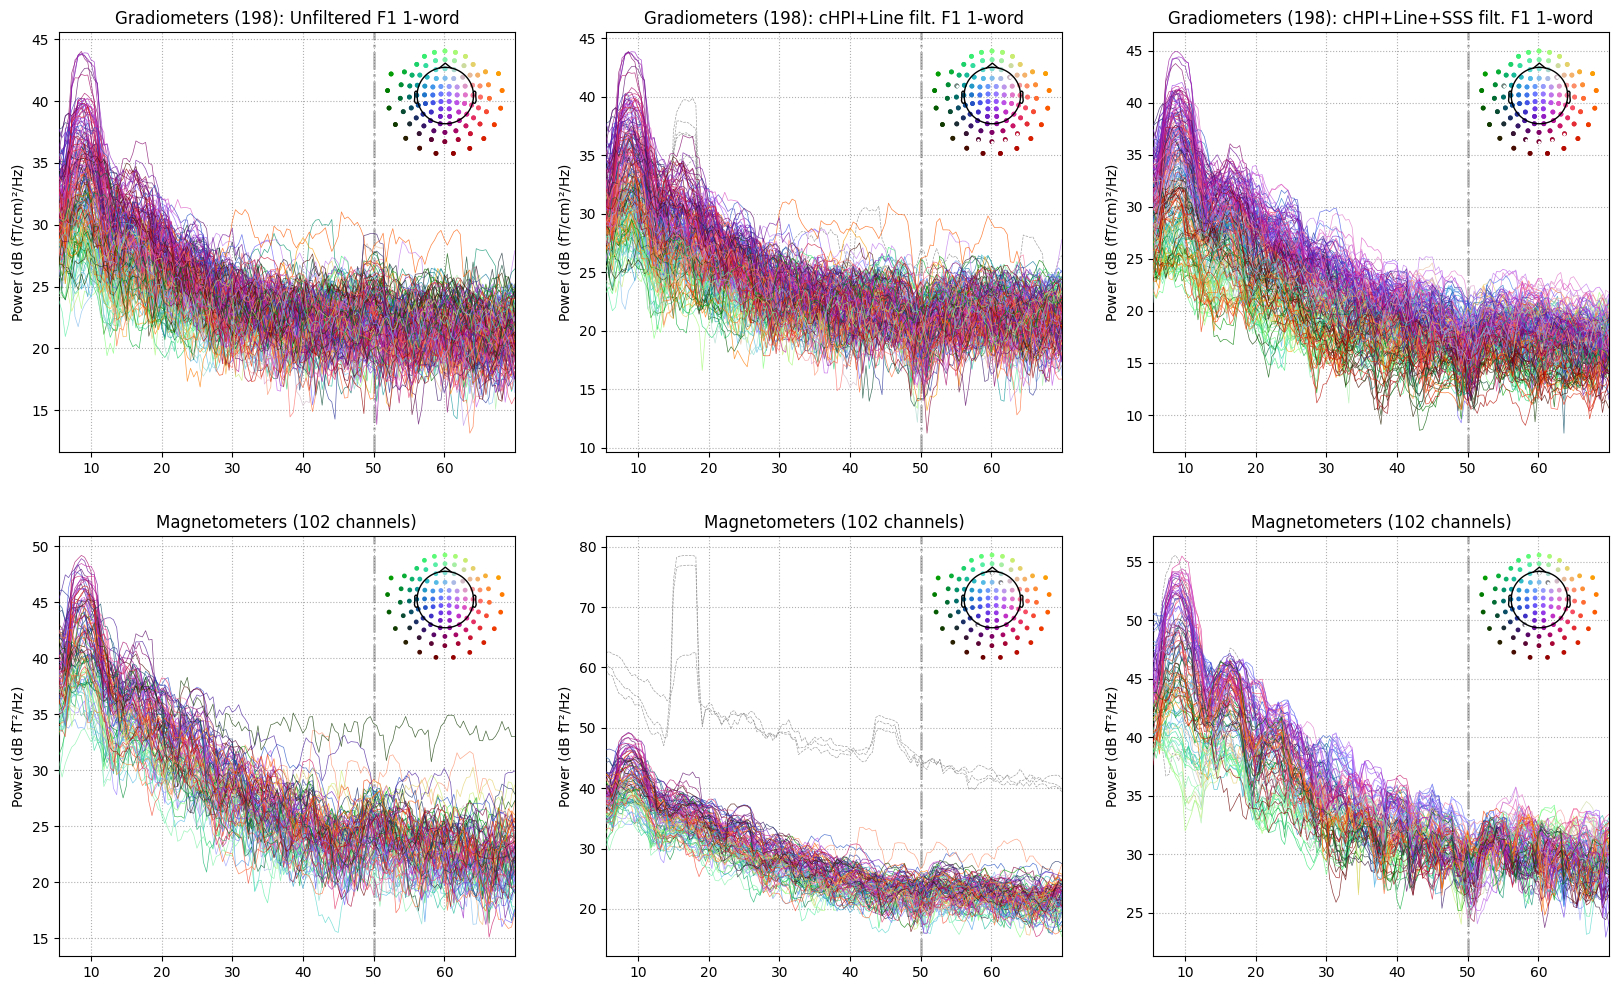

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12))
evokeds_raw[0].compute_psd(fmin=5.0, fmax=70).plot(axes=ax[:2, 0])
ax[0, 0].set_title("Gradiometers (198): Unfiltered F1 1-word")
evokeds_chpiline[0].compute_psd(fmin=5.0, fmax=70).plot(axes=ax[:2, 1])
ax[0, 1].set_title("Gradiometers (198): cHPI+Line filt. F1 1-word")
evokeds_sss[0].compute_psd(fmin=5.0, fmax=70).plot(axes=ax[:2, 2])
ax[0, 2].set_title("Gradiometers (198): cHPI+Line+SSS filt. F1 1-word")

In [8]:
ax[i]

array([<Axes: title={'center': 'Magnetometers (RMS)'}, xlabel='Time (s)', ylabel='fT'>,
       <Axes: title={'center': 'Gradiometers (RMS)'}, xlabel='Time (s)', ylabel='fT/cm'>],
      dtype=object)